In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'S:\SUNNY PC\Elevate Labs\Datasets\iris.csv')

In [2]:
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [5]:
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [8]:
df.drop('Id', axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
X = df.drop('Species', axis=1)

y = df['Species']

In [15]:
classes = y.unique()
classes_sorted = np.sort(classes)
label_map = {label : idx for idx, label in enumerate(classes_sorted)}
y = y.map(label_map).values

In [16]:
label_map

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42, 
                                                    stratify=y
                                                    )

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

X_train_std.shape, X_test_std.shape

((120, 5), (30, 5))

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [21]:
y_pred = knn.predict(X_test_std)

In [22]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=np.arange(len(classes_sorted)))

Baseline K=5 Accuracy : 1.000


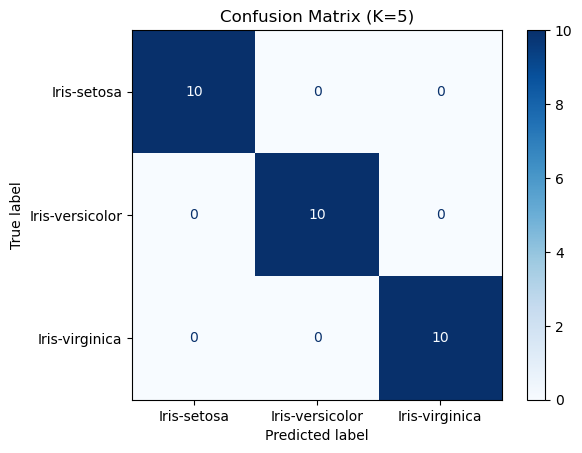

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

print(f"Baseline K=5 Accuracy : {acc:.3f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=classes_sorted)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (K=5)")
plt.show()

In [24]:
k_val = list(range(1, 26, 2))
accs = []

for k in k_val :
    m = KNeighborsClassifier(n_neighbors=k)
    m.fit(X_train_std, y_train)
    p = m.predict(X_test_std)
    accs.append(accuracy_score(y_test, p))

best_idx = int(np.argmax(accs))
best_k = k_val[best_idx]
best_acc = accs[best_idx]

In [25]:
print("K tuning results :")
for k, a in zip(k_val, accs) :
    print(f'K={k} : Accuracy={a:.3f}')
print(f'Best K={best_k} with Accuracy={best_acc:.3f}')

K tuning results :
K=1 : Accuracy=1.000
K=3 : Accuracy=1.000
K=5 : Accuracy=1.000
K=7 : Accuracy=1.000
K=9 : Accuracy=1.000
K=11 : Accuracy=1.000
K=13 : Accuracy=1.000
K=15 : Accuracy=1.000
K=17 : Accuracy=1.000
K=19 : Accuracy=1.000
K=21 : Accuracy=1.000
K=23 : Accuracy=1.000
K=25 : Accuracy=1.000
Best K=1 with Accuracy=1.000


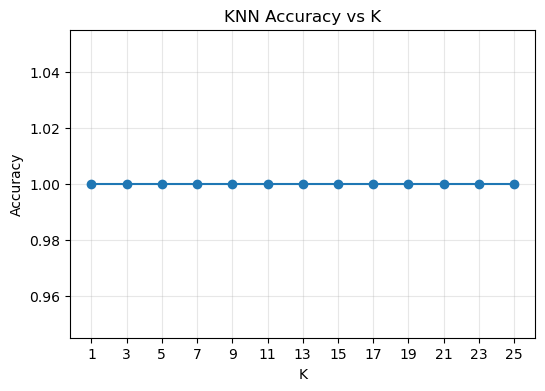

In [26]:
plt.figure(figsize=(6,4))
plt.plot(k_val, accs, marker="o")
plt.xticks(k_val)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K")
plt.grid(True, alpha=0.3)
plt.show()

Best model K=1 test accuracy: 1.000


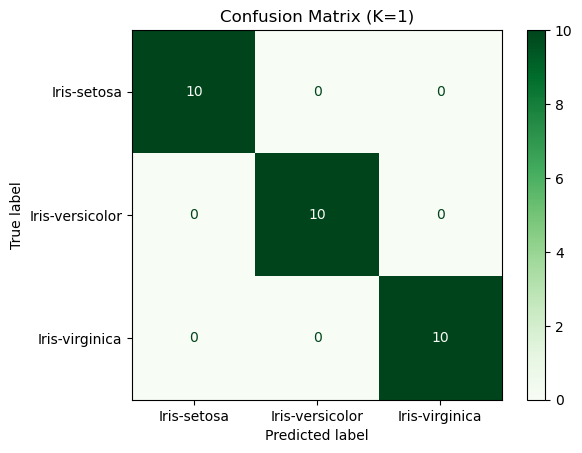

In [27]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_std, y_train)
y_pred_best = knn_best.predict(X_test_std)
acc_best = accuracy_score(y_test, y_pred_best)
cm_best = confusion_matrix(y_test, y_pred_best, labels=np.arange(len(classes_sorted)))
print(f"Best model K={best_k} test accuracy: {acc_best:.3f}")
ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=classes_sorted).plot(cmap="Greens")
plt.title(f"Confusion Matrix (K={best_k})")
plt.show()

In [31]:
X2_train = X_train[["PetalLengthCm", "PetalWidthCm"]]
X2_test  = X_test[["PetalLengthCm", "PetalWidthCm"]]

In [32]:
sc2 = StandardScaler()
X2_train_s = sc2.fit_transform(X2_train)
X2_test_s = sc2.transform(X2_test)

In [33]:
model2 = KNeighborsClassifier(n_neighbors=best_k)
model2.fit(X2_train_s, y_train)

KNeighborsClassifier(n_neighbors=1)

In [34]:
x_min, x_max = X2_train_s[:,0].min()-0.5, X2_train_s[:,0].max()+0.5
y_min, y_max = X2_train_s[:,1].min()-0.5, X2_train_s[:,1].max()+0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
zz = model2.predict(grid).reshape(xx.shape)

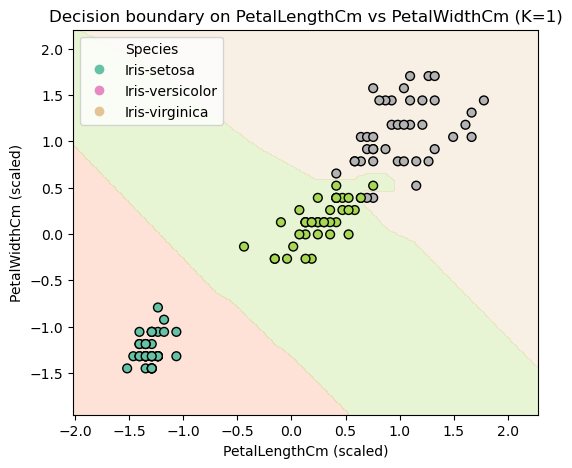

In [37]:
plt.figure(figsize=(6,5))
plt.contourf(xx, yy, zz, alpha=0.25, levels=np.arange(len(classes_sorted)+1)-0.5, cmap="Set2")
scatter = plt.scatter(X2_train_s[:,0], X2_train_s[:,1], c=y_train, cmap="Set2", edgecolor="k", s=40)
handles, indices = scatter.legend_elements(prop="colors", num=len(classes_sorted))
labels = [str(c) for c in classes_sorted]
plt.xlabel(f"PetalLengthCm (scaled)")
plt.ylabel(f"PetalWidthCm (scaled)")
plt.title(f"Decision boundary on PetalLengthCm vs PetalWidthCm (K={best_k})")
plt.legend(handles=handles, labels=labels, title="Species")
plt.show()

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

knn_pca = KNeighborsClassifier(n_neighbors=best_k)
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=1)

In [39]:
x_min, x_max = X_train_pca[:,0].min()-0.5, X_train_pca[:,0].max()+0.5
y_min, y_max = X_train_pca[:,1].min()-0.5, X_train_pca[:,1].max()+0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
zz = knn_pca.predict(grid).reshape(xx.shape)

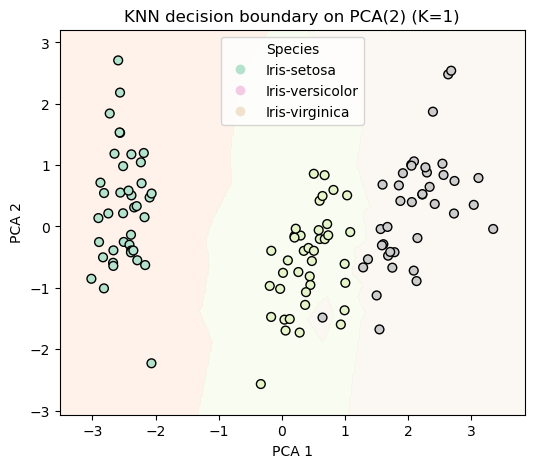

In [40]:
plt.figure(figsize=(6,5))
plt.contourf(xx, yy, zz, alpha=0.25, levels=np.arange(len(classes_sorted)+1)-0.5, cmap="Pastel2")
scatter = plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap="Pastel2", edgecolor="k", s=40)
handles, indices = scatter.legend_elements(prop="colors", num=len(classes_sorted))
labels = [str(c) for c in classes_sorted]
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title(f"KNN decision boundary on PCA(2) (K={best_k})")
plt.legend(handles=handles, labels=labels, title="Species")
plt.show()